Classifier: KNN with k =  1 is completed.
Classifier: KNN with k =  2 is completed.
Classifier: KNN with k =  5 is completed.
Classifier: KNN with k =  10 is completed.
Classifier: KNN with k =  15 is completed.
Classifier: KNN with k =  20 is completed.


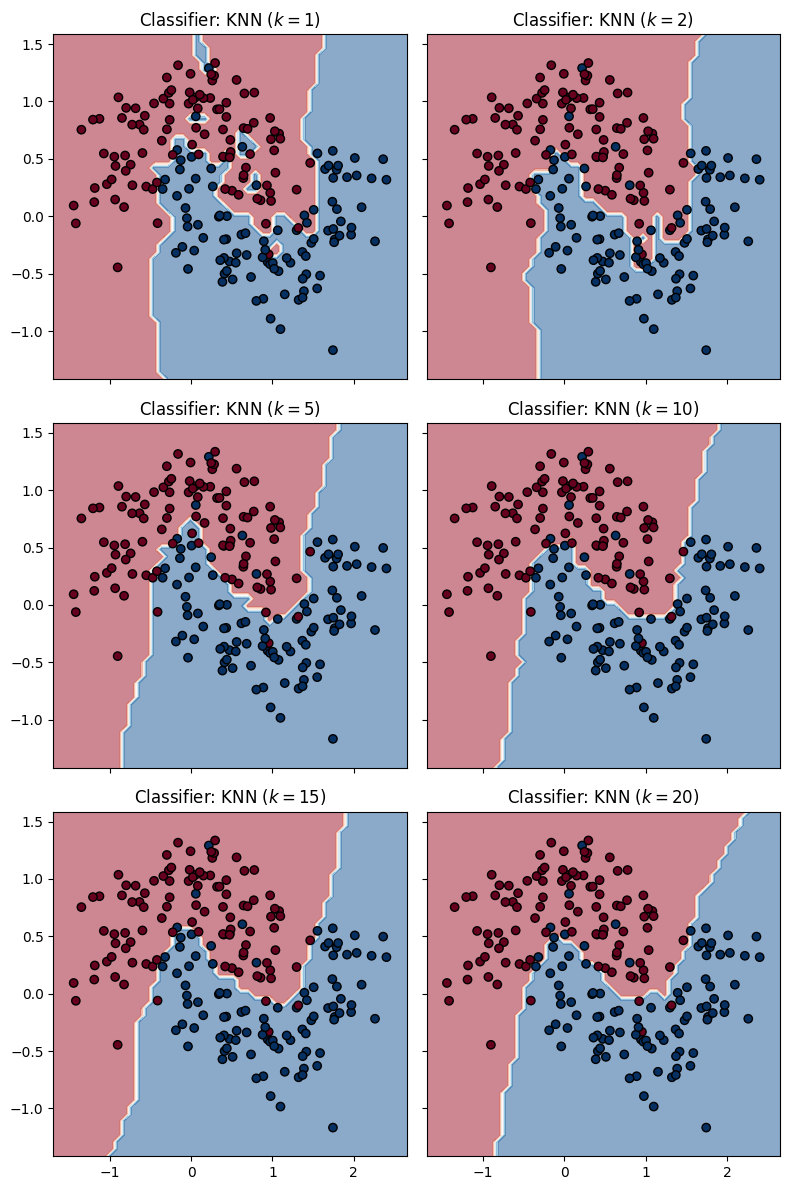

In [2]:
%matplotlib inline

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.metrics import accuracy_score

def euclidean_distance(a, b, keepdims=False):
    return(np.linalg.norm(a-b))

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=5, dist_function=euclidean_distance):
        super(KNN, self).__init__()
        self.k = k
        self.dist_function = dist_function
        self.train_points = None

    def fit(self, X, y):
        self.train_points = []
        for i in range(len(X)):
            self.train_points.append([X[i][0],X[i][1],y[i]])

    def predict(self, X):
        y_predicted = []
        for j in range(len(X)):
            distances = []
            for i in range(len(self.train_points)):
                distances.append([self.dist_function(self.train_points[i][:2], X[j]), self.train_points[i][2]])
            distances.sort(key = lambda distances: distances[0])
            count = 0
            for i in range(self.k):
                count = count + distances[i][1]
            if (count > (self.k/2)):
                y_predicted.append(1)
            else:
                y_predicted.append(0)
        return y_predicted

# Generate toy data (two moons dataset)
n = 200
X, Y = datasets.make_moons(n, noise=0.25, random_state=1234)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)

classifiers = [(KNN(k), f'KNN ($k={k}$)') for k in [1, 2, 5, 10, 15, 20]]

res = 50  # Resolution of the grid in cells
x_max, y_max = np.max(X, axis=0) + 0.25
x_min, y_min = np.min(X, axis=0) - 0.25
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, res),
                             np.linspace(y_min, y_max, res))

grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

rows = (len(classifiers) + 1) // 2
fig, axes = plt.subplots(rows, 2, sharex=True, sharey=True, figsize=(8, 4*rows))
for (clf, name), ax in zip(classifiers, axes.ravel()):
    clf.fit(X_train, Y_train)
    grid_out = clf.predict(grid_input)
    grid_out = np.array(grid_out)
    grid_out =grid_out.reshape(grid_x.shape)

    ax.set_title(f'Classifier: {name}')
    ax.contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap=plt.cm.RdBu)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu, edgecolor='k')
    result = name.find('=')
    print("Classifier: KNN with k = ",name[result+1:-2],"is completed.")
plt.tight_layout()
plt.show()
plt.close(fig)

